#  Name:Omkar Pawar
 College:Ajeenkya DY patil University
 Task4  :SMS Spam Collection Dataset
    



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

import spacy


    
from wordcloud import WordCloud
from collections import Counter
import string

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')


In [3]:

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [7]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['message']=df['message'].str.lower()

In [11]:
df


,target,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


# Encoding

In [12]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [13]:
df

,target,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


# EDA

<Axes: >

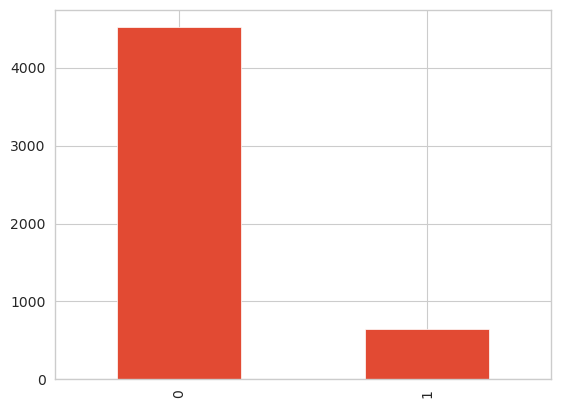

In [14]:
df['target'].value_counts().plot(kind='bar')

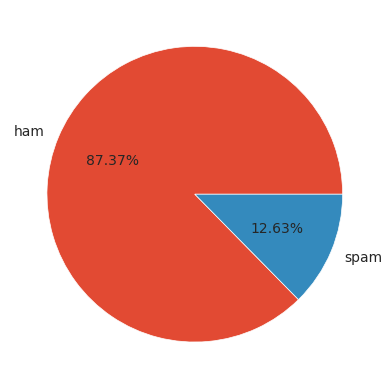

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

# Feature Engineering

In [16]:
# number of characters in messages
df['characters']=df['message'].apply(len)
# number of words in messages
df['words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
# number of sentences in messages
df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df

,target,message,characters,words,sentences
0,0,"go until jurong point, crazy.. available only ...",111,23,1
1,0,ok lar... joking wif u oni...,29,8,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,will ì_ b going to esplanade fr home?,37,9,1
5569,0,"pity, * was in mood for that. so...any other s...",57,15,2
5570,0,the guy did some bitching but i acted like i'd...,125,27,1


In [18]:
df[["characters","words","sentences"]].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.256336,1.882763
std,58.236293,13.187718,1.359589
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,215.000000,34.000000


In [19]:
df[df['target']==0][["characters","words","sentences"]].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.941984,1.744243
std,56.358207,13.364792,1.291389
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,215.000000,34.000000


In [20]:
df[df['target']==1][["characters","words","sentences"]].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.346095,2.840735
std,30.137753,6.848915,1.432230
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

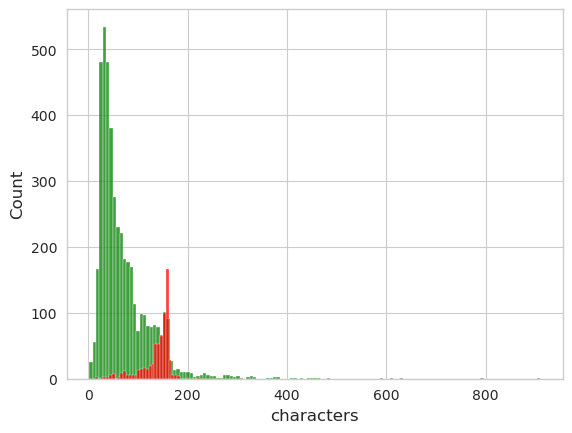

In [21]:
sns.histplot(df[df['target']==0]['characters'],color='green')
sns.histplot(df[df['target']==1]['characters'],color='red')


<Axes: xlabel='sentences', ylabel='Count'>

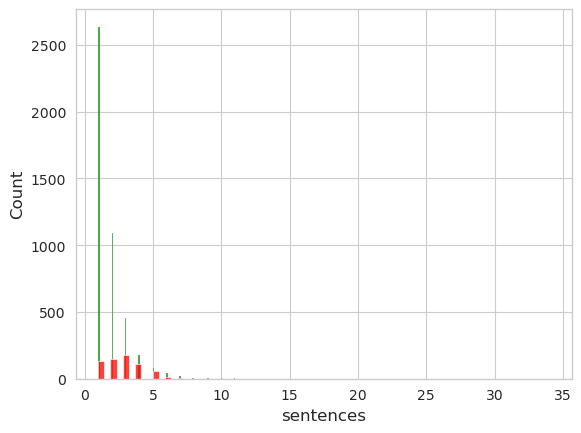

In [22]:
sns.histplot(df[df['target']==0]['sentences'],color='green')
sns.histplot(df[df['target']==1]['sentences'],color='red')


<Axes: xlabel='words', ylabel='Count'>

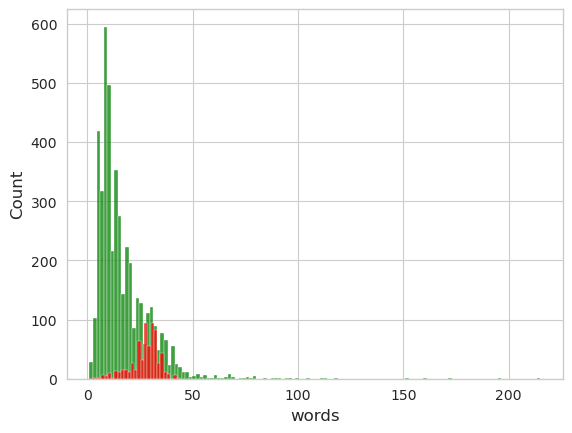

In [23]:
sns.histplot(df[df['target']==0]['words'],color='green')
sns.histplot(df[df['target']==1]['words'],color='red')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


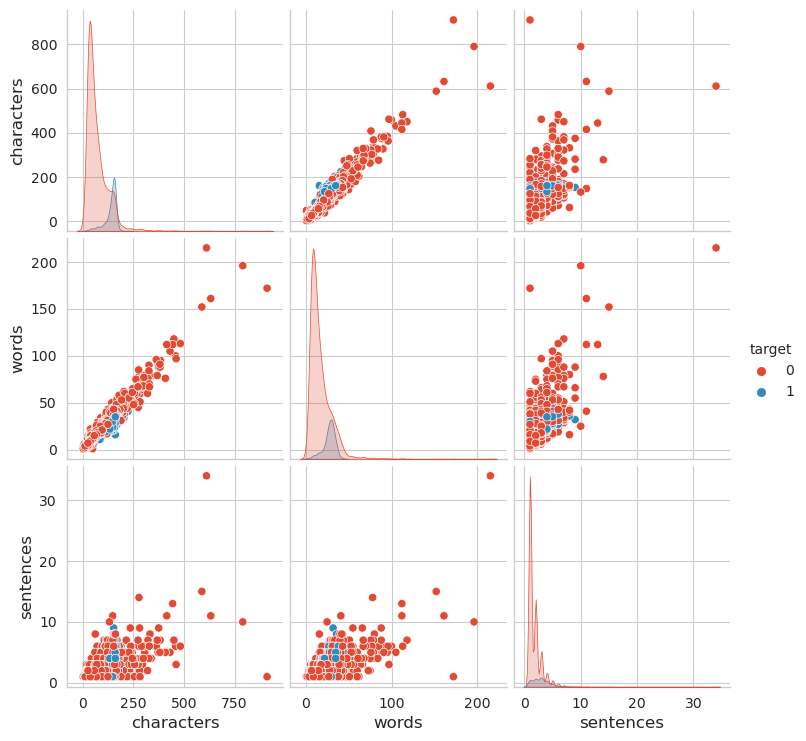

In [24]:
sns.pairplot(df,hue='target')

<Axes: >

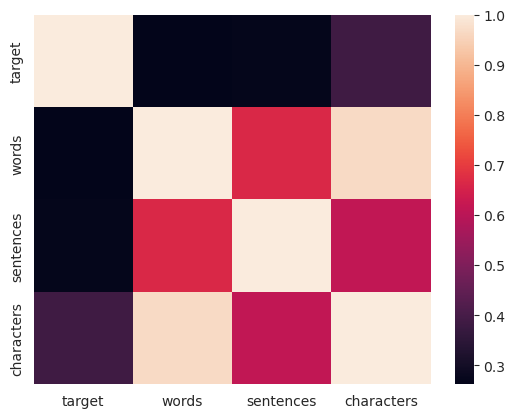

In [25]:
sns.heatmap(df[['target','words','sentences','characters']].corr())

THANK YOU